In [50]:
import numpy as np
import matplotlib.pyplot as plt

Simulate a stock price path using standard Brownian motion.

$$S_t = s + \sigma W_t $$

$$W_{t_{i+1}} = W_{t_i} + \sqrt{t_{i+1} - t_i} Z_{i+1}$$

In [51]:
s = 100 # starting price
sigma = 2 # volatility
T = 1 # end time
dt = 0.005 # timestep
n = 1000 # number of simulations

t = np.arange(0, T + dt, dt)
Z = np.random.normal(0, 1, (n, len(t) - 1)) # iid normal random variables
S = np.zeros((n, len(t))) # stock prices
S[:, 0] = s

for i in range(1, len(t)):
    S[:, i] = S[:, i-1] + sigma * np.sqrt(dt) * Z[:, i-1]

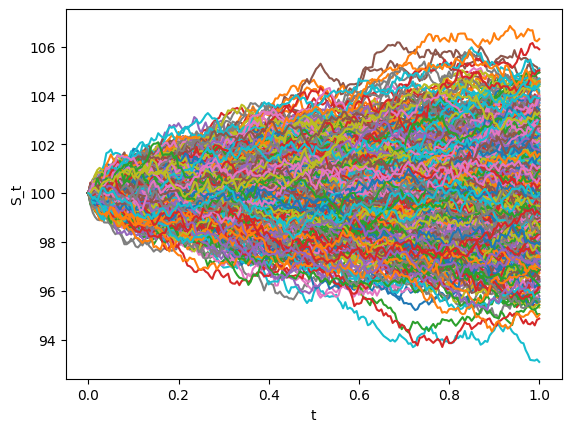

In [52]:
for i in range(n):
    plt.plot(t, S[i, :])
plt.xlabel("t")
plt.ylabel("S_t")
plt.show()

In [53]:
X = np.zeros((n, len(t))) # wealth
q = np.zeros((n, len(t))) # inventory
gamma = 0.1 # inventory risk

k = 1.5 # order book liquidity
A = 140 # order book liquidity
Na = np.zeros((n, len(t) - 1)) # number of stocks sold
Nb = np.zeros((n, len(t) - 1)) # number of stocks bought

r = np.zeros((n, len(t) - 1)) # reservation price
pa = np.zeros((n, len(t) - 1)) # quoted ask price
pb = np.zeros((n, len(t) - 1)) # quoted bid price
delta = np.zeros(len(t) - 1) # optimal spread

for i in range(0, len(t) - 1):
    r[:, i] = S[:, i] - q[:, i] * gamma * sigma**2 * (T - t[i])
    delta[i] = gamma * sigma**2 * (T - t[i]) + 2 / gamma * np.log(1 + gamma / k)
    pa[:, i] = r[:, i] + delta[i] / 2
    pb[:, i] = r[:, i] - delta[i] / 2
    lambdaa = A * np.exp(-k * (pa[:, i] - S[:, i]) / 2) * dt
    lambdab = A * np.exp(-k * (S[:, i] - pb[:, i]) / 2) * dt

    '''
    lambdaa[lambdaa > 1] = 1
    lambdab[lambdab > 1] = 1
    lambdaa[lambdaa < 0] = 0
    lambdab[lambdab < 0] = 0

    print(np.min(lambdaa), np.max(lambdaa))
    print(np.min(lambdab), np.max(lambdab))

    Na[:, i], Nb[:, i] = np.random.binomial(1, [lambdaa, lambdab])
    '''
    
    Na[:, i], Nb[:, i] = np.random.poisson([lambdaa, lambdab])
    q[:, i+1] = q[:, i] + Nb[:, i] - Na[:, i]
    X[:, i+1] = X[:, i] - Nb[:, i] * pb[:, i] + Na[:, i] * pa[:, i]

pnl = X + q * S

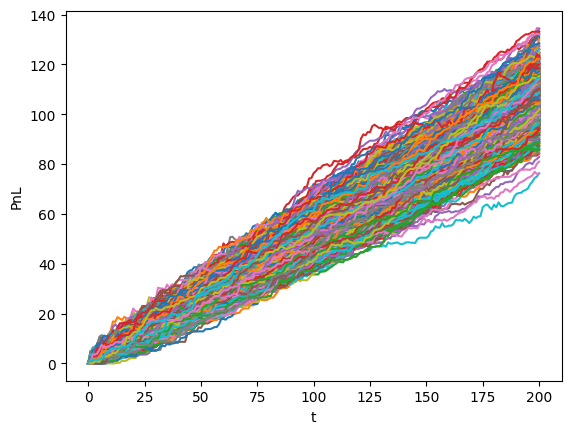

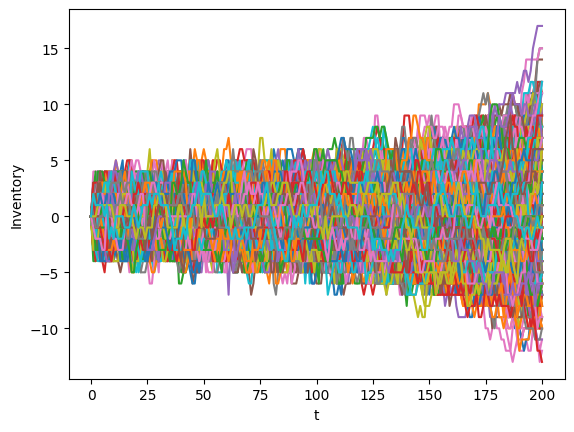

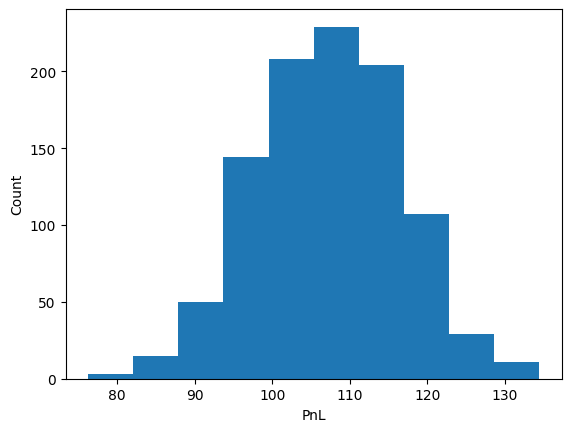

In [54]:
for i in range(n):  
    plt.plot(pnl[i, :])
plt.xlabel("t")
plt.ylabel("PnL")
plt.show()

for i in range(n):
    plt.plot(q[i, :])
plt.xlabel("t")
plt.ylabel("Inventory")
plt.show()

plt.hist(pnl[:, -1])
plt.xlabel("PnL")
plt.ylabel("Count")
plt.show()